In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

### Importing training and testing data

In [2]:
Y_train = pd.read_csv('Y_train.csv',index_col = 0)
X_train = pd.read_csv('X_train.csv',index_col = 0)

In [3]:
Y_test = pd.read_csv('Y_test.csv',index_col = 0)
X_test = pd.read_csv('X_test.csv',index_col = 0)

In [4]:
#importing new data
loan_data_backup = pd.read_csv('loan_data_2015.csv')

### Explore data

In [5]:
#create a copy
df = loan_data_backup.copy()

In [6]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,NaN,15.0,0.0,7158,26.7,24.0,w,8650.0,8650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,165450.0,0.0,1.0,1.0,1.0,11.0,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,672xx,KS,15.22,2.0,Jul-11,0.0,18.0,NaN,6.0,0.0,1058,24.6,6.0,w,4225.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4888.0,0.0,1.0,0.0,0.0,47.0,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,CARDIOVASCULAR TECH,10+ years,RENT,42500.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,460xx,IN,31.04,0.0,Dec-98,1.0,NaN,NaN,10.0,0.0,5812,40.9,23.0,w,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41166.0,1.0,3.0,0.0,2.0,13.0,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,NaN,6.0,0.0,7869,56.2,18.0,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Dec-15,0.0,NaN,1,JOINT,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

## Preprocessing

### Preprocessing continuous variables

Employment length 

In [9]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

In [10]:
#emp_length column should be int but is of object type, we need to rectify this
df['emp_length_int'] = df['emp_length'].str.replace('\+ years','')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year','0')
df['emp_length_int'] = df['emp_length_int'].str.replace('n/a','0')
df['emp_length_int'] = df['emp_length_int'].str.replace(' years','')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year','')
df.emp_length_int.unique()

array(['10', '0', '5', '3', '4', nan, '2', '8', '9', '1', '6', '7'],
      dtype=object)

In [11]:
df.emp_length_int = pd.to_numeric(df.emp_length_int)
df.emp_length_int.dtype

dtype('float64')

Earliest credit line

In [12]:
df['earliest_cr_line'].head()

0    Feb-90
1    Jul-01
2    Jul-11
3    Dec-98
4    Aug-00
Name: earliest_cr_line, dtype: object

Try running the cell below by uncommenting the relevant code lines and see if it works, otherwise the same result is achieved by taking on a different process which is in the cells further below

Process 1:

In [13]:
# Assume we are now in December 2017
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
df['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
df['months_since_earliest_cr_line'].describe()
# Shows some descriptive statisics for the values of a column.

count    421094.000000
mean        227.354876
std          98.123989
min        -612.000000
25%         167.000000
50%         212.000000
75%         277.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

Process 2:

In [14]:
#earliest_cr_line column should be date type
from datetime import datetime
#df['earliest_cr_line_date'] = df['earliest_cr_line'][df.earliest_cr_line.isnull() == False].apply(lambda x: datetime.strptime(str(x),'%b-%y'))

date_ref = datetime.strptime('2017-12-01','%Y-%m-%d')
df['ref_date'] = [date_ref]*len(df)

#changing the column from dates to months since the date
#df['months_since_earliest_cr_line'] = (df.ref_date - df.earliest_cr_line_date)/np.timedelta64(1,'M')

#import math
#df['months_since_earliest_cr_line'] = df['months_since_earliest_cr_line'][df.months_since_earliest_cr_line.isnull() == False].apply(lambda x: math.floor(x))
#df['months_since_earliest_cr_line'].head()

#checking if values are in realistic range
#df['months_since_earliest_cr_line'].describe()

Evaluating the results of either of the above process

In [15]:
#negative values makes no sense, check what's going on
df.loc[:,['earliest_cr_line','earliest_cr_line_date','months_since_earliest_cr_line']][df['months_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
254,Jan-57,2057-01-01,-469.0
618,Aug-64,2064-08-01,-560.0
648,Jul-68,2068-07-01,-607.0
1808,Jan-65,2065-01-01,-565.0
2583,Sep-64,2064-09-01,-561.0
...,...,...,...
418890,Jun-68,2068-06-01,-606.0
420450,Jan-66,2066-01-01,-577.0
420642,Sep-68,2068-09-01,-609.0
420794,Sep-65,2065-09-01,-573.0


In [16]:
#we see the error, let's replace 2060s by 1960s and 2050s by 1950s
df.loc[:,'earliest_cr_line_date'][df['months_since_earliest_cr_line']<0]=df.loc[:,'earliest_cr_line_date'][df['months_since_earliest_cr_line']<0].apply(lambda x: x.replace(year = x.year - 100))

In [17]:
df['months_since_earliest_cr_line'] = (df.ref_date - df.earliest_cr_line_date)/np.timedelta64(1,'M')

#getting the floor value of months
import math
df['months_since_earliest_cr_line'] = df['months_since_earliest_cr_line'][df.months_since_earliest_cr_line.isnull() == False].apply(lambda x: math.floor(x))
# df['months_since_earliest_cr_line'].head()

#checking if values are in realistic range
df['months_since_earliest_cr_line'].describe()

count    421094.000000
mean        230.326711
std          91.346249
min          60.000000
25%         168.000000
50%         212.000000
75%         278.000000
max         887.000000
Name: months_since_earliest_cr_line, dtype: float64

Term

In [18]:
#term column should also be numeric but isn't
df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [19]:
df['term_int'] = df['term'].str.replace(' months','')
df['term_int'] = df['term_int'].str.strip()
df['term_int'].unique()

array(['60', '36'], dtype=object)

In [20]:
df['term_int'] = df['term_int'].astype(float)

In [21]:
type(df['term_int'][0])

numpy.float64

Issue date

In [22]:
# Assume we are now in December 2017
df['issue_date'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
df['months_since_issue_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
df['months_since_issue_date'].describe()
# Shows some descriptive statisics for the values of a column.

count    421094.000000
mean         29.044629
std           3.458162
min          24.000000
25%          26.000000
50%          29.000000
75%          32.000000
max          35.000000
Name: months_since_issue_date, dtype: float64

### Preprocessing discrete variables

In [23]:
#creating dummy variables for a few of the discrete value columns
disc_columns = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status']

In [24]:
def create_dummies(columns,df):
    dummies = []
    for column in columns:
        dummies.append(pd.get_dummies(df[column], prefix = column, prefix_sep = ':'))
    dummies_data = pd.concat(dummies,axis = 1)
    return dummies_data

In [25]:
dummies_data = create_dummies(disc_columns, df)

In [26]:
df = pd.concat([df,dummies_data],axis = 1)

### handling missing values

In [27]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 203, dtype: int64

In [28]:
#imputing missing values
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace = True)
df['total_rev_hi_lim'].isnull().sum()

0

In [29]:
#imputing missing values in annual income with the mean
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace = True)
df['annual_inc'].isnull().sum()

0

In [30]:
#imputing 0 for the missing values in the following columns
zero_columns = ['months_since_earliest_cr_line','acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']

for column in zero_columns:
    df[column].fillna(0,inplace = True)



### PD model

In [31]:
df['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [32]:
df['good_bad'] = np.where(df['loan_status'].isin(['Default','Late (31-120 days)','Charged Off',
                                                  'Does not meet the credit policy. Status:Charged Off']),0,1)
#df['good_bad']

In [33]:
#splitting the data
#from sklearn.model_selection import train_test_split
#columns = df.columns
#features = list(set(columns) - set(['good_bad']))
#X = df[features]
#Y = df['good_bad']
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

### Data preparation : calculating weight of evidence and information value for a column

### preprocessing training data

In [34]:
#uncomment first 2 lines to preprocess training dataset and once done, come back and re-comment those and uncomment next 2 lines
inputs_prep = df.drop('good_bad',axis = 1)
targets_prep = df['good_bad']
#inputs_prep = X_test
#targets_prep = Y_test

In [35]:
inputs_prep['grade'].unique()

array(['C', 'A', 'B', 'F', 'D', 'E', 'G'], dtype=object)

In [36]:
#creating a new dataframe to assess the grade column
df1 = pd.concat([inputs_prep['grade'], targets_prep], axis = 1)
df1.head()

,grade,good_bad
0,C,1
1,A,1
2,C,1
3,C,1
4,B,1


In [37]:
#in order to make the code reusable for other categorical columns, we are not using column names in the groupby function
#instead we opt to use their position in the dataframe
df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,73335
1,B,117606
2,C,120567
3,D,62654
4,E,34948
5,F,9817
6,G,2167


In [38]:
df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].sum()

,grade,good_bad
0,A,73068
1,B,116559
2,C,118462
3,D,60617
4,E,33443
5,F,9135
6,G,1959


In [39]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].sum()], axis = 1)

In [40]:
#removing redundant columns and renaming columns
df1 = df1.iloc[:,[0,1,3]]
df1.columns = [df1.columns.values[0],'total_obs','good_obs']
df1

,grade,total_obs,good_obs
0,A,73335,73068
1,B,117606,116559
2,C,120567,118462
3,D,62654,60617
4,E,34948,33443
5,F,9817,9135
6,G,2167,1959


In [41]:
df1['bad_obs'] = df1['total_obs'] - df1['good_obs']
df1

,grade,total_obs,good_obs,bad_obs
0,A,73335,73068,267
1,B,117606,116559,1047
2,C,120567,118462,2105
3,D,62654,60617,2037
4,E,34948,33443,1505
5,F,9817,9135,682
6,G,2167,1959,208


In [42]:
#finding proportion of observations in each category
df1['total_obs_%'] = df1['total_obs']/df1['total_obs'].sum()
df1

,grade,total_obs,good_obs,bad_obs,total_obs_%
0,A,73335,73068,267,0.174154
1,B,117606,116559,1047,0.279287
2,C,120567,118462,2105,0.286318
3,D,62654,60617,2037,0.148789
4,E,34948,33443,1505,0.082993
5,F,9817,9135,682,0.023313
6,G,2167,1959,208,0.005146


In [43]:
#calculating % of good and bad borrowers by category i.e., what % of total good and bad borrowers fall into each category
df1['good_obs_%'] = df1['good_obs']/df1['good_obs'].sum()
df1['bad_obs_%'] = df1['bad_obs']/df1['bad_obs'].sum()
df1

,grade,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%
0,A,73335,73068,267,0.174154,0.176816,0.034008
1,B,117606,116559,1047,0.279287,0.282059,0.133359
2,C,120567,118462,2105,0.286318,0.286664,0.268119
3,D,62654,60617,2037,0.148789,0.146686,0.259457
4,E,34948,33443,1505,0.082993,0.080928,0.191695
5,F,9817,9135,682,0.023313,0.022106,0.086868
6,G,2167,1959,208,0.005146,0.004741,0.026493


In [44]:
#calculating the weight of evidence of each category
df1['WoE'] = np.log(df1['good_obs_%']/df1['bad_obs_%'])
df1

,grade,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE
0,A,73335,73068,267,0.174154,0.176816,0.034008,1.648502
1,B,117606,116559,1047,0.279287,0.282059,0.133359,0.749074
2,C,120567,118462,2105,0.286318,0.286664,0.268119,0.066882
3,D,62654,60617,2037,0.148789,0.146686,0.259457,-0.570298
4,E,34948,33443,1505,0.082993,0.080928,0.191695,-0.862345
5,F,9817,9135,682,0.023313,0.022106,0.086868,-1.368556
6,G,2167,1959,208,0.005146,0.004741,0.026493,-1.720744


In [45]:
#sorting the dataframe by increasing weight of evidence
df1 =df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE
0,G,2167,1959,208,0.005146,0.004741,0.026493,-1.720744
1,F,9817,9135,682,0.023313,0.022106,0.086868,-1.368556
2,E,34948,33443,1505,0.082993,0.080928,0.191695,-0.862345
3,D,62654,60617,2037,0.148789,0.146686,0.259457,-0.570298
4,C,120567,118462,2105,0.286318,0.286664,0.268119,0.066882
5,B,117606,116559,1047,0.279287,0.282059,0.133359,0.749074
6,A,73335,73068,267,0.174154,0.176816,0.034008,1.648502


In [46]:
#calculating the absolute difference in proportion of good loans and WoE between successive categories
df1['good_%_diff'] = df1['good_obs_%'].diff().abs()
df1['WoE_diff'] = df1['WoE'].diff().abs()
df1

,grade,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff
0,G,2167,1959,208,0.005146,0.004741,0.026493,-1.720744,NaN,NaN
1,F,9817,9135,682,0.023313,0.022106,0.086868,-1.368556,0.017365,0.352187
2,E,34948,33443,1505,0.082993,0.080928,0.191695,-0.862345,0.058823,0.506211
3,D,62654,60617,2037,0.148789,0.146686,0.259457,-0.570298,0.065758,0.292048
4,C,120567,118462,2105,0.286318,0.286664,0.268119,0.066882,0.139978,0.637180
5,B,117606,116559,1047,0.279287,0.282059,0.133359,0.749074,0.004605,0.682192
6,A,73335,73068,267,0.174154,0.176816,0.034008,1.648502,0.105243,0.899428


In [47]:
#calculaitng information value
df1['Info_value'] = ((df1['good_obs_%'] - df1['bad_obs_%'])*df1['WoE']).sum()

In [48]:
df1

,grade,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,G,2167,1959,208,0.005146,0.004741,0.026493,-1.720744,NaN,NaN,0.633941
1,F,9817,9135,682,0.023313,0.022106,0.086868,-1.368556,0.017365,0.352187,0.633941
2,E,34948,33443,1505,0.082993,0.080928,0.191695,-0.862345,0.058823,0.506211,0.633941
3,D,62654,60617,2037,0.148789,0.146686,0.259457,-0.570298,0.065758,0.292048,0.633941
4,C,120567,118462,2105,0.286318,0.286664,0.268119,0.066882,0.139978,0.637180,0.633941
5,B,117606,116559,1047,0.279287,0.282059,0.133359,0.749074,0.004605,0.682192,0.633941
6,A,73335,73068,267,0.174154,0.176816,0.034008,1.648502,0.105243,0.899428,0.633941


### automating the above procedure by writing a function

In [49]:
def woe_discrete(df, feature, target_df):
    df1 = pd.concat([df[feature], target_df],axis = 1)
    
    #using groupby on the target data based on categories of the feature variable
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].sum()], axis = 1)
    
    #removing redundant columns and renaming columns
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],'total_obs','good_obs']
    
    #finding number of bad loans
    df1['bad_obs'] = df1['total_obs'] - df1['good_obs']
    
    #finding proportion of observations in each category
    df1['total_obs_%'] = (df1['total_obs']/df1['total_obs'].sum())*100

    #calculating % of good and bad borrowers by category i.e., what % of total good and bad borrowers fall into each category
    df1['good_obs_%'] = (df1['good_obs']/df1['good_obs'].sum())*100
    df1['bad_obs_%'] = (df1['bad_obs']/df1['bad_obs'].sum())*100
    
    #calculating the weight of evidence of each category
    df1['WoE'] = np.log(df1['good_obs_%']/df1['bad_obs_%'])
    
    #sorting the dataframe by increasing weight of evidence
    df1 =df1.sort_values(['WoE'])
    df1 = df1.reset_index(drop = True)
    
    #calculating the absolute difference in proportion of good loans and WoE between successive categories
    df1['good_%_diff'] = df1['good_obs_%'].diff().abs()
    df1['WoE_diff'] = df1['WoE'].diff().abs()

    #calculaitng information value
    df1['Info_value'] = ((df1['good_obs_%'] - df1['bad_obs_%'])*df1['WoE']).sum()
    
    return df1

In [50]:
df_temp = woe_discrete(inputs_prep, 'grade', targets_prep)

In [51]:
#df_temp

### visualising results of data preparation

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [53]:
def plot_by_woe(df,rotation = 0):
    x = np.array(df.iloc[:,0]) #converting into an ndarray because matplotlib doesn't work too well with df and strings
    y = df['WoE']
    plt.figure(figsize = (20,8))
    plt.plot(x,y, 'o--', c = 'Black')
    plt.xlabel(df.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence for ' + str(df.columns[0]), size = 15)
    plt.xticks(rotation = rotation)

In [54]:
#plot_by_woe(df_temp)

### preprocessing discrete variables : creating dummy variables

In [55]:
#for home ownership column
df_temp = woe_discrete(inputs_prep, 'home_ownership', targets_prep)
df_temp

,home_ownership,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,RENT,167644,163777,3867,39.811539,39.632129,49.254872,-0.217368,NaN,NaN,inf
1,OWN,45766,44885,881,10.868357,10.861648,11.221500,-0.032594,28.770481,0.184775,inf
2,MORTGAGE,207682,204579,3103,49.319629,49.505739,39.523628,0.225190,38.644091,0.257784,inf
3,ANY,2,2,0,0.000475,0.000484,0.000000,inf,49.505255,inf,inf


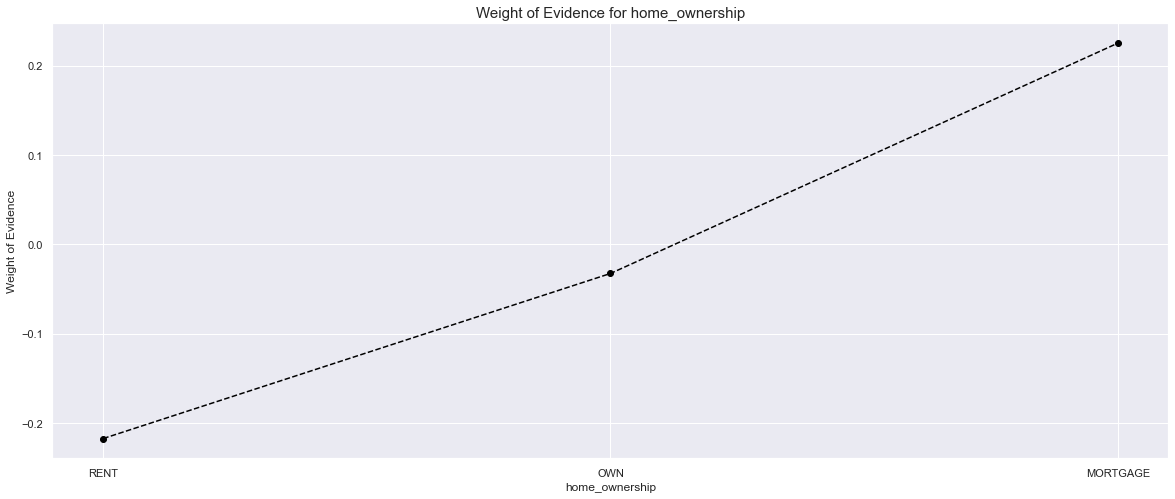

In [56]:
plot_by_woe(df_temp)

In [57]:
inputs_prep['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [58]:
# we see that other, none and any categories are heavily underrepresented 
# so it is best to combine these 3 categories with the riskiest category having enough representation i.e., the rent category

inputs_prep['home_ownership:RENT_OTHER_ANY_NONE'] = inputs_prep['home_ownership:RENT'] + inputs_prep['home_ownership:ANY']

In [59]:
#looking at some advanced methods for creating dummies
(df['addr_state'].unique()) #total 49 categories

array(['DC', 'IN', 'KS', 'IL', 'OR', 'VA', 'PA', 'GA', 'TN', 'OH', 'NY',
       'FL', 'NJ', 'RI', 'NC', 'AL', 'TX', 'SC', 'MD', 'WA', 'MO', 'MN',
       'NH', 'VT', 'AZ', 'MI', 'MA', 'CA', 'LA', 'DE', 'NM', 'CO', 'WI',
       'SD', 'CT', 'NE', 'HI', 'AR', 'MT', 'WV', 'WY', 'OK', 'NV', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [60]:
df_temp = woe_discrete(inputs_prep, 'addr_state', targets_prep)

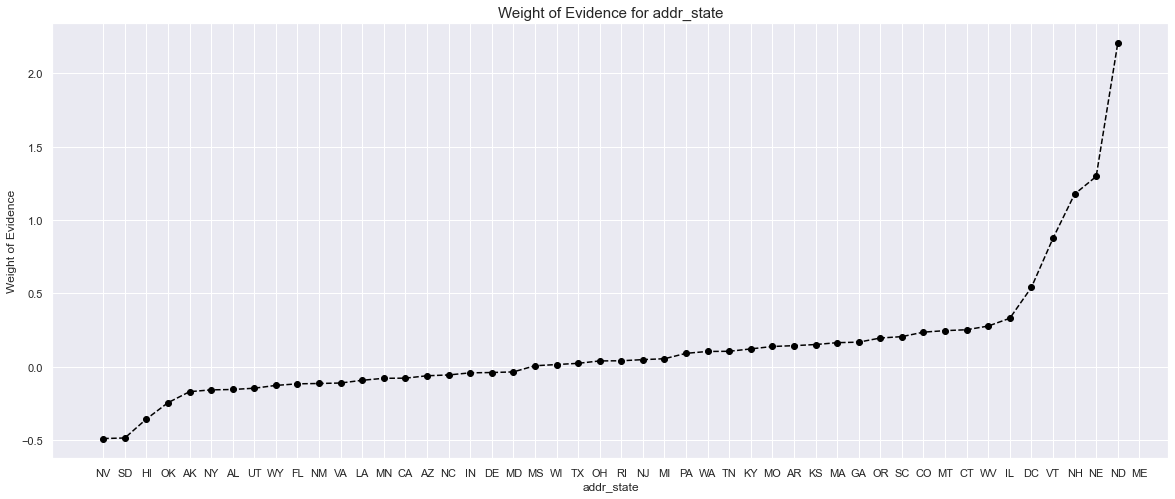

In [61]:
plot_by_woe(df_temp)

In [62]:
if ['addr_state:ND'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['addr_state:ND'] = 0

In [63]:
if ['addr_state:ID'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['addr_state:ID'] = 0

In [64]:
if ['addr_state:IA'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['addr_state:IA'] = 0

In [65]:
#plot_by_woe(df_temp.iloc[2:-1])

In [66]:
#plot_by_woe(df_temp[6:43])

In [67]:
#df_temp[36:]

In [68]:
# now we have to create dummy variables by combining existing variables based on no. of observations and weight of evidence
inputs_prep['addr_state:NE_IA_NV_ND_HI_ID_FL'] = sum([inputs_prep['addr_state:NE'],inputs_prep['addr_state:IA'],
                                                     inputs_prep['addr_state:NV'],inputs_prep['addr_state:ND'],
                                                     inputs_prep['addr_state:HI'],inputs_prep['addr_state:ID'],
                                                     inputs_prep['addr_state:FL']]) #adding ND to the this category as it is absent

inputs_prep['addr_state:AL_OK'] = sum([inputs_prep['addr_state:AL'],inputs_prep['addr_state:OK']])

#separate category for NY as it hhas substantial number of observations(that category is already present)
inputs_prep['addr_state:NJ_LA_MD'] = sum([inputs_prep['addr_state:NJ'],inputs_prep['addr_state:LA'],inputs_prep['addr_state:MD']])

inputs_prep['addr_state:VA_NC_MO'] = sum([inputs_prep['addr_state:VA'],inputs_prep['addr_state:NC'],inputs_prep['addr_state:MO']])

#Separate category already exists for CA
inputs_prep['addr_state:NM_UT_AR_SD_DE_MI'] = sum([inputs_prep['addr_state:NM'],inputs_prep['addr_state:UT'],
                                                  inputs_prep['addr_state:AR'],inputs_prep['addr_state:SD'],
                                                  inputs_prep['addr_state:DE'],inputs_prep['addr_state:MI']])

inputs_prep['addr_state:TN_AZ'] = sum([inputs_prep['addr_state:TN'],inputs_prep['addr_state:AZ']])

#Separate category for PA
inputs_prep['addr_state:KY_IN'] = sum([inputs_prep['addr_state:KY'],inputs_prep['addr_state:IN']])
                                                                     
inputs_prep['addr_state:MN_RI_OH_MA'] = sum([inputs_prep['addr_state:MN'],inputs_prep['addr_state:RI'],
                                            inputs_prep['addr_state:OH'],inputs_prep['addr_state:MA']])

inputs_prep['addr_state:GA_OR'] = sum([inputs_prep['addr_state:GA'],inputs_prep['addr_state:OR']])

inputs_prep['addr_state:WI_WA'] = sum([inputs_prep['addr_state:WI'],inputs_prep['addr_state:WA']])

#Separate category for TX
inputs_prep['addr_state:MT_IL_CT'] = sum([inputs_prep['addr_state:MT'],inputs_prep['addr_state:IL'],inputs_prep['addr_state:CT']])

inputs_prep['addr_state:VT_SC_KS_CO'] = sum([inputs_prep['addr_state:VT'],inputs_prep['addr_state:SC'],
                                            inputs_prep['addr_state:KS'],inputs_prep['addr_state:CO']])

inputs_prep['addr_state:AK_NH_WV_MS_WY_DC_ME'] = sum([inputs_prep['addr_state:AK'],inputs_prep['addr_state:DC'],
                                                     inputs_prep['addr_state:NH'],inputs_prep['addr_state:WY'],
                                                     inputs_prep['addr_state:WV'],inputs_prep['addr_state:MS'],
                                                     inputs_prep['addr_state:ME']])


In [69]:
#working with verification status column
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [70]:
df_temp = woe_discrete(inputs_prep, 'verification_status', targets_prep)
#df_temp

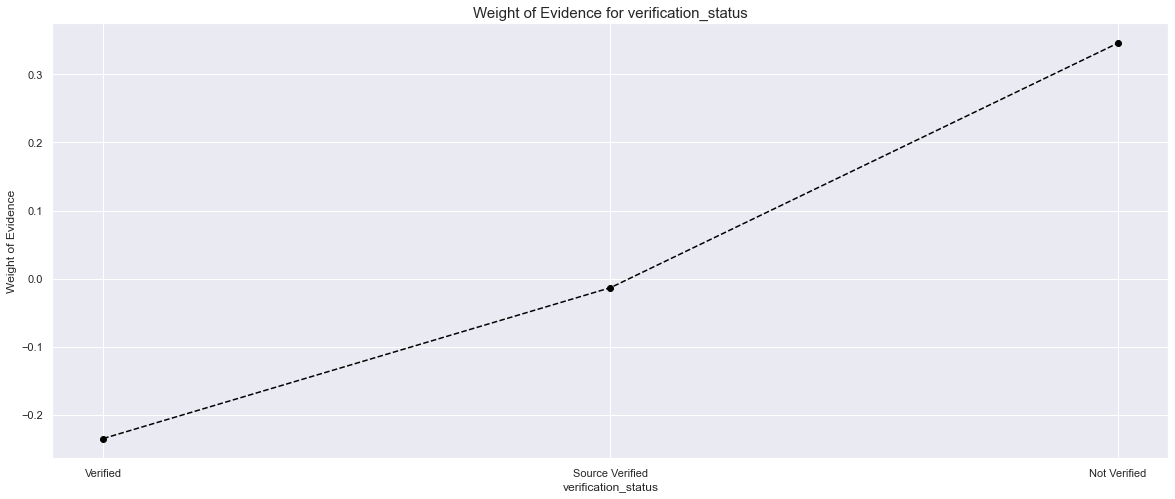

In [71]:
plot_by_woe(df_temp)

In [72]:
#checking purpose column
df['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'major_purchase', 'other', 'medical', 'small_business', 'house',
       'car', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [73]:
df_temp = woe_discrete(inputs_prep, 'purpose', targets_prep)
#df_temp

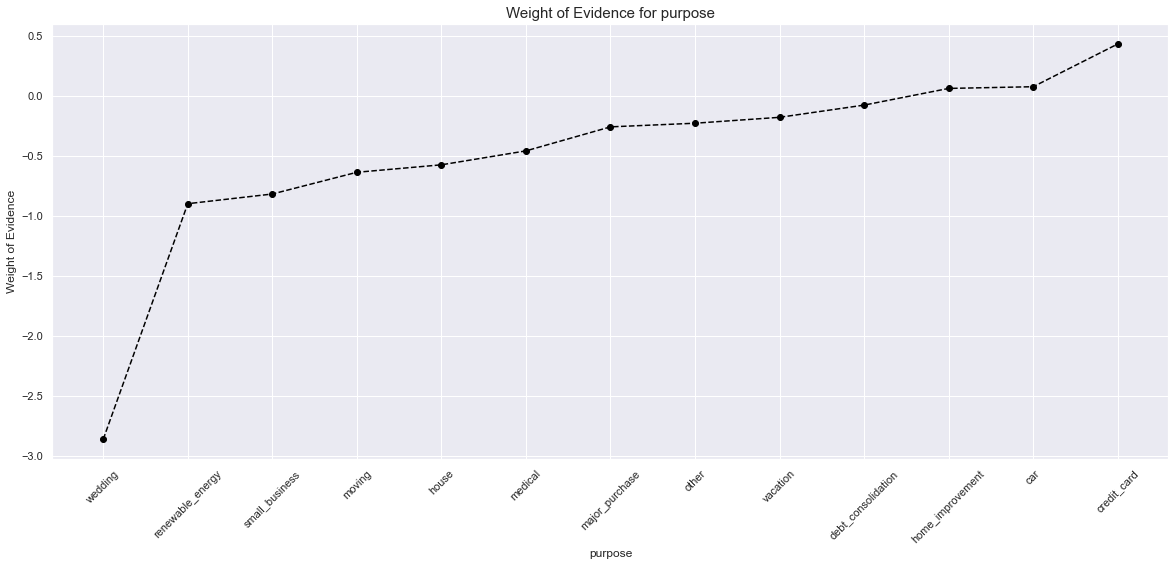

In [74]:
plot_by_woe(df_temp,rotation=45)

In [75]:
df['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'major_purchase', 'other', 'medical', 'small_business', 'house',
       'car', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [76]:
#combining categories
inputs_prep['purpose:small-business_educational_moving_renewable-energy_other'] = sum([inputs_prep['purpose:small_business'],
                                                                                        inputs_prep['purpose:educational'],
                                                                                        inputs_prep['purpose:moving'],
                                                                                        inputs_prep['purpose:renewable_energy'],
                                                                                      inputs_prep['purpose:other']])

inputs_prep['purpose:house_medical_wedding_vacation'] = sum([inputs_prep['purpose:house'],inputs_prep['purpose:medical'],
                                                            inputs_prep['purpose:wedding'],inputs_prep['purpose:vacation']])

#separate category for debt consolidation
inputs_prep['purpose:home-improvement_major-purchase_car'] = sum([inputs_prep['purpose:home_improvement'],inputs_prep['purpose:car'],
                                                                 inputs_prep['purpose:major_purchase']])
#separate category for credit card

In [77]:
#checking initial list status column
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [78]:
df_temp = woe_discrete(inputs_prep,'initial_list_status',targets_prep)
#df_temp

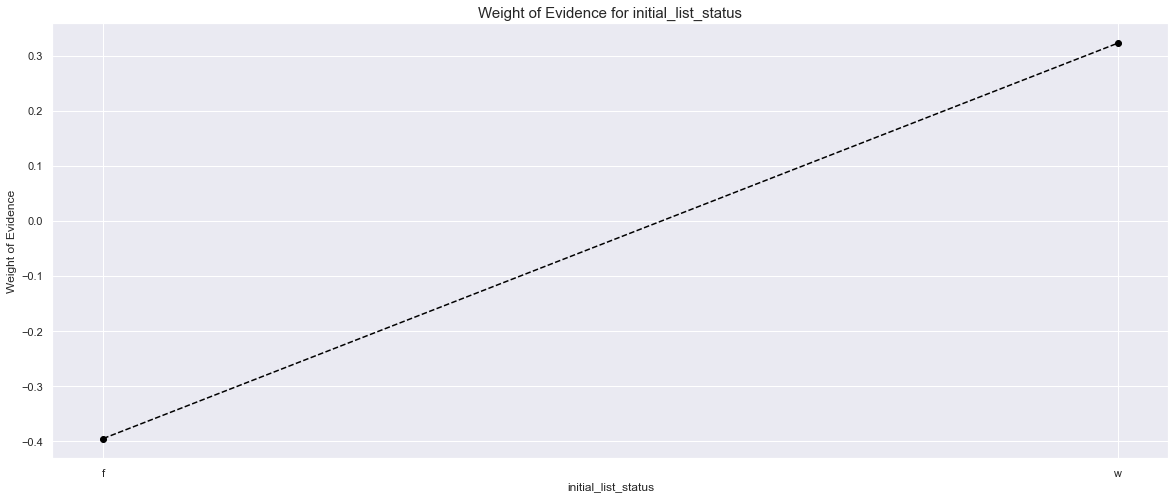

In [79]:
plot_by_woe(df_temp)

### preprocessing continuous variables: automating calculations and visualising results

In [80]:
def woe_ordered_continuous(df, feature, target_df):
    df1 = pd.concat([df[feature], target_df],axis = 1)
    
    #using groupby on the target data based on categories of the feature variable
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].sum()], axis = 1)
    
    #removing redundant columns and renaming columns
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],'total_obs','good_obs']
    
    #finding number of bad loans
    df1['bad_obs'] = df1['total_obs'] - df1['good_obs']
    
    #finding proportion of observations in each category
    df1['total_obs_%'] = (df1['total_obs']/df1['total_obs'].sum())*100

    #calculating % of good and bad borrowers by category i.e., what % of total good and bad borrowers fall into each category
    df1['good_obs_%'] = (df1['good_obs']/df1['good_obs'].sum())*100
    df1['bad_obs_%'] = (df1['bad_obs']/df1['bad_obs'].sum())*100
    
    #calculating the weight of evidence of each category
    df1['WoE'] = np.log(df1['good_obs_%']/df1['bad_obs_%'])
    
    #calculating the absolute difference in proportion of good loans and WoE between successive categories
    df1['good_%_diff'] = df1['good_obs_%'].diff().abs()
    df1['WoE_diff'] = df1['WoE'].diff().abs()

    #calculaitng information value
    df1['Info_value'] = ((df1['good_obs_%'] - df1['bad_obs_%'])*df1['WoE']).sum()
    
    return df1

In [81]:
#checking the term_int variable
inputs_prep['term_int'].unique()

array([60., 36.])

In [82]:
df_temp = woe_ordered_continuous(inputs_prep,'term_int',targets_prep)
#df_temp

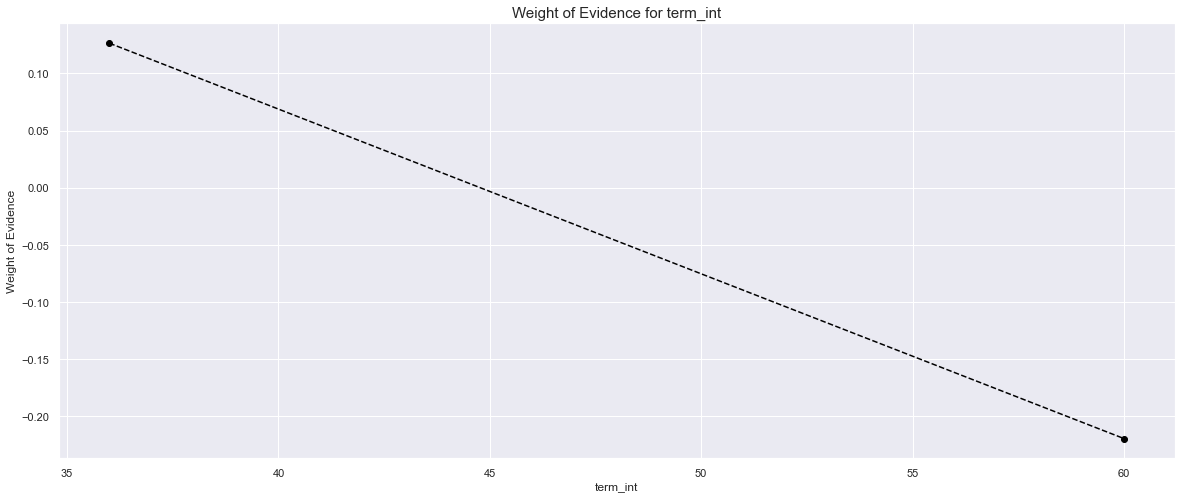

In [83]:
plot_by_woe(df_temp)

In [84]:
#creating dummies for term_int variable
inputs_prep['term_int:36'] = np.where(inputs_prep['term_int'] == 36,1,0)
inputs_prep['term_int:60'] = np.where(inputs_prep['term_int'] == 60,1,0)

In [85]:
#checking the emp_length_int variable
df['emp_length_int'].unique()

array([10.,  0.,  5.,  3.,  4.,  2.,  8.,  9.,  1.,  6.,  7.])

In [86]:
df_temp = woe_ordered_continuous(inputs_prep, 'emp_length_int',targets_prep)
#df_temp

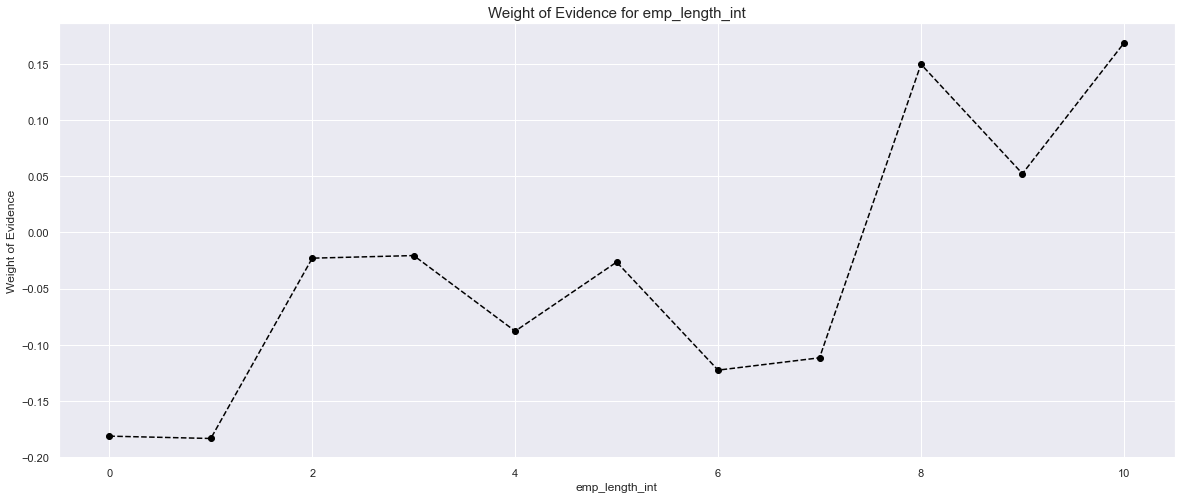

In [87]:
plot_by_woe(df_temp)

In [88]:
#creating dummies for emp_length_int variable
inputs_prep['emp_length_int:0'] = np.where(inputs_prep['emp_length_int'].isin([0]),1,0)
inputs_prep['emp_length_int:1'] = np.where(inputs_prep['emp_length_int'].isin([1]),1,0)
inputs_prep['emp_length_int:2_3_4'] = np.where(inputs_prep['emp_length_int'].isin([2,3,4]),1,0)
inputs_prep['emp_length_int:5_6'] = np.where(inputs_prep['emp_length_int'].isin([5,6]),1,0)
inputs_prep['emp_length_int:7_8'] = np.where(inputs_prep['emp_length_int'].isin([7,8]),1,0)
inputs_prep['emp_length_int:9'] = np.where(inputs_prep['emp_length_int'].isin([9]),1,0)
inputs_prep['emp_length_int:10'] = np.where(inputs_prep['emp_length_int'].isin([10]),1,0)

In [89]:
df['months_since_issue_date'].unique()

array([24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [90]:
inputs_prep['months_since_issue_date_factor'] = pd.cut(inputs_prep['months_since_issue_date'], 50)
x = list(inputs_prep['months_since_issue_date_factor'].unique())
y = []
for i in sorted(x):
    y.append(str(i))
    
"""this y is then passed as the labels argument. We had to do this because there was some difficulty plotting the graph
with entries on x axis being intervals and converting those intervals into str object solves that issue"""


'this y is then passed as the labels argument. We had to do this because there was some difficulty plotting the graph\nwith entries on x axis being intervals and converting those intervals into str object solves that issue'

In [91]:
#fine classing this variable using pd.cut
#inputs_prep['months_since_issue_date_factor'] = pd.cut(inputs_prep['months_since_issue_date'], 51, labels = y)

In [92]:
df_temp = woe_ordered_continuous(inputs_prep, 'months_since_issue_date_factor', targets_prep)
#df_temp

In [93]:
#plot_by_woe(df_temp,90)

In [94]:
#creating dummies
inputs_prep['months_since_issue_date:<38'] = np.where(inputs_prep['months_since_issue_date'] < 38,1,0)
inputs_prep['months_since_issue_date:38-39'] = np.where(inputs_prep['months_since_issue_date'].isin(range(38,40)),1,0)
inputs_prep['months_since_issue_date:40-41'] = np.where(inputs_prep['months_since_issue_date'].isin(range(40,42)),1,0)
inputs_prep['months_since_issue_date:42-43'] = np.where(inputs_prep['months_since_issue_date'].isin(range(42,44)),1,0)
inputs_prep['months_since_issue_date:44-48'] = np.where(inputs_prep['months_since_issue_date'].isin(range(44,49)),1,0)
inputs_prep['months_since_issue_date:49-52'] = np.where(inputs_prep['months_since_issue_date'].isin(range(49,53)),1,0)
inputs_prep['months_since_issue_date:53-59'] = np.where(inputs_prep['months_since_issue_date'].isin(range(53,60)),1,0)
inputs_prep['months_since_issue_date:60-64'] = np.where(inputs_prep['months_since_issue_date'].isin(range(60,65)),1,0)
inputs_prep['months_since_issue_date:65-84'] = np.where(inputs_prep['months_since_issue_date'].isin(range(65,85)),1,0)
inputs_prep['months_since_issue_date:>84'] = np.where(inputs_prep['months_since_issue_date']>84,1,0)

In [95]:
#working on interest rate column
inputs_prep['int_rate_factor'] = pd.cut(inputs_prep['int_rate'],50)

In [96]:
a = list(inputs_prep['int_rate_factor'].unique())
b = []
for i in sorted(a):
    b.append(str(i))
    
#inputs_prep['int_rate_factor'] = pd.cut(inputs_prep['int_rate'], 51, labels = b)

In [97]:
df_temp = woe_ordered_continuous(inputs_prep, 'int_rate_factor', targets_prep)
#df_temp

In [98]:
#plot_by_woe(df_temp,90)

In [99]:
#creating dummies
inputs_prep['int_rate:<=9.548'] = np.where(inputs_prep['int_rate'] <= 9.548,1,0)
inputs_prep['int_rate:9.548-12.025'] = np.where((inputs_prep['int_rate'] > 9.548) & (inputs_prep['int_rate']<=12.025),1,0)
inputs_prep['int_rate:12.025-15.74'] = np.where((inputs_prep['int_rate'] > 12.025) & (inputs_prep['int_rate']<=15.74),1,0)
inputs_prep['int_rate:15.74-20.281'] = np.where((inputs_prep['int_rate'] > 15.74) & (inputs_prep['int_rate']<=20.281),1,0)
inputs_prep['int_rate:>20.281'] = np.where(inputs_prep['int_rate'] > 20.281,1,0)

In [100]:
#working on funded_amnt column
inputs_prep['funded_amnt_factor'] = pd.cut(inputs_prep['funded_amnt'],50)

In [101]:
c = list(inputs_prep['funded_amnt_factor'].unique())
d = []
for i in sorted(c):
    d.append(str(i))
    
inputs_prep['funded_amnt_factor'] = pd.cut(inputs_prep['funded_amnt'],50, labels = d)

In [102]:
df_temp = woe_ordered_continuous(inputs_prep, 'funded_amnt_factor',targets_prep)
#df_temp

In [103]:
#plot_by_woe(df_temp,90)

Since the weight of evidence fluctuates rapidly and the common trend line is nearly horizontal, we conclude that
there is no clear cut association between funded_amnt and weight of evidence. Hence, we shall not include this column in our model

In [104]:
#preprocessing months_since_earliest_cr_line column
inputs_prep['months_since_earliest_cr_line_factor']=pd.cut(inputs_prep['months_since_earliest_cr_line'],50)

In [105]:
df_temp = woe_ordered_continuous(inputs_prep,'months_since_earliest_cr_line_factor',targets_prep)
#df_temp

In [106]:
x = list(df_temp.iloc[:,0])
y = []
for i in x:
    y.append(str(i))
len(y)

inputs_prep['months_since_earliest_cr_line_factor'] = pd.cut(inputs_prep['months_since_earliest_cr_line'],50,labels = y)

In [107]:
df_temp = woe_ordered_continuous(inputs_prep, 'months_since_earliest_cr_line_factor',targets_prep)
#df_temp

In [108]:
#plot_by_woe(df_temp[8:],90)

In [109]:
#creating dummies
inputs_prep['months_since_earliest_cr_line:<142'] = np.where(inputs_prep['months_since_earliest_cr_line']<142,1,0)
inputs_prep['months_since_earliest_cr_line:142-230'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(142,231)),1,0)
inputs_prep['months_since_earliest_cr_line:231-266'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(231,267)),1,0)
inputs_prep['months_since_earliest_cr_line:267-354'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(267,355)),1,0)
inputs_prep['months_since_earliest_cr_line:355-549'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(355,550)),1,0)
inputs_prep['months_since_earliest_cr_line:>=550'] = np.where(inputs_prep['months_since_earliest_cr_line']>=550,1,0)

In [110]:
#working on installment column
inputs_prep['installment_factor'] = pd.cut(inputs_prep['installment'],50)

In [111]:
x = list(inputs_prep['installment_factor'].unique())
y = []
for i in sorted(x):
    y.append(str(i))

inputs_prep['installment_factor'] = pd.cut(inputs_prep['installment'], 50, labels =y)

In [112]:
df_temp = woe_ordered_continuous(inputs_prep, 'installment_factor', targets_prep)
#df_temp

In [113]:
#plot_by_woe(df_temp,90)

Not enough importance seems to be available in this column and hence, we are not creating dummies

In [114]:
#working on delinq_2yrs column
len(inputs_prep['delinq_2yrs'].unique())
#no need for fine classing

26

In [115]:
df_temp = woe_ordered_continuous(inputs_prep, 'delinq_2yrs',targets_prep)
#df_temp

In [116]:
#plot_by_woe(df_temp)

In [117]:
#creating dummies
inputs_prep['delinq_2yrs:0'] = np.where(inputs_prep['delinq_2yrs']==0,1,0)
inputs_prep['delinq_2yrs:1-3'] = np.where((inputs_prep['delinq_2yrs']>0) & (inputs_prep['delinq_2yrs']<=3),1,0)
inputs_prep['delinq_2yrs:>3'] = np.where(inputs_prep['delinq_2yrs']>3,1,0)

In [118]:
#working on inq_last_6mths column
inputs_prep['inq_last_6mths'].unique()
#no need for fine classing

array([0., 1., 3., 4., 2., 5., 6.])

In [119]:
df_temp = woe_ordered_continuous(inputs_prep,'inq_last_6mths',targets_prep)
#df_temp

In [120]:
#plot_by_woe(df_temp)

In [121]:
#creating dummies
inputs_prep['inq_last_6mths:0'] = np.where(inputs_prep['inq_last_6mths']==0,1,0)
inputs_prep['inq_last_6mths:1'] = np.where(inputs_prep['inq_last_6mths']==1,1,0)
inputs_prep['inq_last_6mths:2'] = np.where(inputs_prep['inq_last_6mths']==2,1,0)
inputs_prep['inq_last_6mths:3-5'] = np.where(inputs_prep['inq_last_6mths'].isin(range(3,6)),1,0)
inputs_prep['inq_last_6mths:>=6'] = np.where(inputs_prep['inq_last_6mths']>=6,1,0)

In [122]:
#working on open_acc column
len(inputs_prep['open_acc'].unique())

73

In [123]:
df_temp = woe_ordered_continuous(inputs_prep,'open_acc',targets_prep)
#df_temp

In [124]:
#plot_by_woe(df_temp)

In [125]:
#plot_by_woe(df_temp[4:31])

In [126]:
#creating dummies
inputs_prep['open_acc:0'] = np.where((inputs_prep['open_acc'] == 0), 1, 0)
inputs_prep['open_acc:1-3'] = np.where((inputs_prep['open_acc'] >= 1) & (inputs_prep['open_acc'] <= 3), 1, 0)
inputs_prep['open_acc:4-12'] = np.where((inputs_prep['open_acc'] >= 4) & (inputs_prep['open_acc'] <= 12), 1, 0)
inputs_prep['open_acc:13-17'] = np.where((inputs_prep['open_acc'] >= 13) & (inputs_prep['open_acc'] <= 17), 1, 0)
inputs_prep['open_acc:18-22'] = np.where((inputs_prep['open_acc'] >= 18) & (inputs_prep['open_acc'] <= 22), 1, 0)
inputs_prep['open_acc:23-25'] = np.where((inputs_prep['open_acc'] >= 23) & (inputs_prep['open_acc'] <= 25), 1, 0)
inputs_prep['open_acc:26-30'] = np.where((inputs_prep['open_acc'] >= 26) & (inputs_prep['open_acc'] <= 30), 1, 0)
inputs_prep['open_acc:>=31'] = np.where((inputs_prep['open_acc'] >= 31), 1, 0)

In [127]:
#working on pub_rec column
inputs_prep['pub_rec'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., 11.,  7.,  6.,  9.,  8., 10., 23.,
       12., 15., 26., 17., 13., 28., 20., 86., 18., 21., 14., 16., 19.,
       49., 22.])

In [128]:
df_temp = woe_ordered_continuous(inputs_prep,'pub_rec',targets_prep)
#df_temp

In [129]:
#plot_by_woe(df_temp[1:])

In [130]:
#creating dummies
inputs_prep['pub_rec:0']=np.where(inputs_prep['pub_rec']==0,1,0)
inputs_prep['pub_rec:1-2']=np.where((inputs_prep['pub_rec'].isin(range(1,3))),1,0)
inputs_prep['pub_rec:3-5']=np.where((inputs_prep['pub_rec'].isin(range(3,6))),1,0)
inputs_prep['pub_rec:>=6']=np.where(inputs_prep['pub_rec']>=6,1,0)

In [131]:
#working on total_acc column
sorted(inputs_prep['total_acc'].unique())

[4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 116.0,
 124.0,
 125.0,
 126.0,
 127.0,
 129.0,
 130.0,
 135.0,
 137.0,
 138.0,
 140.0,
 146.0,
 151.0,
 162.0,
 169.0]

In [132]:
#fine classing
inputs_prep['total_acc_factor'] = pd.cut(inputs_prep['total_acc'],50)

In [133]:
df_temp = woe_ordered_continuous(inputs_prep,'total_acc_factor',targets_prep)
#df_temp

In [134]:
x = list(df_temp.iloc[:,0])
y = []
for i in x:
    y.append(str(i))

inputs_prep['total_acc_factor'] = pd.cut(inputs_prep['total_acc'],50,labels = y)

In [135]:
df_temp = woe_ordered_continuous(inputs_prep,'total_acc_factor',targets_prep)
#df_temp[:9]

In [136]:
#plot_by_woe(df_temp[0:9],90)

In [137]:
#creating dummies
inputs_prep['total_acc:<=15'] = np.where(inputs_prep['total_acc']<=15,1,0)
inputs_prep['total_acc:16-28'] = np.where(inputs_prep['total_acc'].isin(range(16,29)),1,0)
inputs_prep['total_acc:29-49'] = np.where(inputs_prep['total_acc'].isin(range(29,50)),1,0)
inputs_prep['total_acc:>=50'] = np.where(inputs_prep['total_acc']>=50,1,0)

In [138]:
#working on acc_now_delinq column
inputs_prep['acc_now_delinq'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5.,  6., 14.])

In [139]:
df_temp = woe_ordered_continuous(inputs_prep, 'acc_now_delinq',targets_prep)
#df_temp

In [140]:
#plot_by_woe(df_temp)

In [141]:
#creating dummies
inputs_prep['acc_now_delinq:0'] = np.where(inputs_prep['acc_now_delinq']==0,1,0)
inputs_prep['acc_now_delinq:>=1'] = np.where(inputs_prep['acc_now_delinq']!=0,1,0)

### preprocessing the annual income column

In [142]:
#making fine classes
inputs_prep['annual_inc_factor'] = pd.cut(inputs_prep['annual_inc'],50)
df_temp = woe_ordered_continuous(inputs_prep,'annual_inc_factor',targets_prep)
#df_temp

In [143]:
#since more than 95% values lie in the first class itself, we probably need more classes to do anything useful
#let's try 100 fine classes
inputs_prep['annual_inc_factor'] = pd.cut(inputs_prep['annual_inc'],100)
df_temp = woe_ordered_continuous(inputs_prep,'annual_inc_factor',targets_prep)
#df_temp

In [144]:
#still more than 95% values are in the first 2 classes
#let's split the data into higher and lower income groups, where people earning more than 140k are in one group and rest in other
#first create a dummy for higher income

inputs_prep['annual_inc:>=140k'] = np.where(inputs_prep['annual_inc']>=140000,1,0)

In [145]:
#create a temp df for storing low income people
inputs_prep_temp = inputs_prep.loc[inputs_prep['annual_inc']<140000,:]

In [146]:
#make fine classes
inputs_prep_temp['annual_inc_factor'] = pd.cut(inputs_prep_temp['annual_inc'],50)
df_temp = woe_ordered_continuous(inputs_prep_temp,'annual_inc_factor',targets_prep[inputs_prep_temp.index])
#df_temp

In [147]:
#we won't be able to plot it just yet due to the issues of plotting intervals, so we convert them to string labels
x = list(inputs_prep_temp['annual_inc_factor'].unique())
y = []
for i in sorted(x):
    y.append(str(i))

inputs_prep_temp['annual_inc_factor'] = pd.cut(inputs_prep_temp['annual_inc'],50,labels = y)

In [148]:
df_temp = woe_ordered_continuous(inputs_prep_temp,'annual_inc_factor',targets_prep[inputs_prep_temp.index])
#df_temp

In [149]:
#plot_by_woe(df_temp,90)

In [150]:
#creating dummies
inputs_prep['annual_inc:<=20k'] = np.where(inputs_prep['annual_inc']<=20000,1,0)
dummies = list(range(20,110,10))
for i in range(8):
    inputs_prep['annual_inc:'+str(dummies[i])+'k-'+str(dummies[i+1])+'k'] = np.where((inputs_prep['annual_inc']>dummies[i]*1000)&(inputs_prep['annual_inc']<=dummies[i+1]*1000),1,0)
inputs_prep['annual_inc:100k-120k'] = np.where((inputs_prep['annual_inc']>100000)&(inputs_prep['annual_inc']<=120000),1,0)
inputs_prep['annual_inc:120k-140k'] = np.where((inputs_prep['annual_inc']>120000)&(inputs_prep['annual_inc']<=140000),1,0)

### preprocessing the mths_since_last_delinq column: contains missing values

In [151]:
#creating a temp df containing only those records where the concerned column is not null
inputs_prep_temp = inputs_prep[inputs_prep['mths_since_last_delinq'].isnull()==False]

In [152]:
#fine classing of temp df
inputs_prep_temp['mths_since_last_delinq_factor'] = pd.cut(inputs_prep['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_delinq_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [153]:
#we still can't plot this
x = list(df_temp.iloc[:,0])
y = []
for i in (x):
    y.append(str(i))

inputs_prep_temp['mths_since_last_delinq_factor'] = pd.cut(inputs_prep_temp['mths_since_last_delinq'],50,labels = y)

In [154]:
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_delinq_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [155]:
#plot_by_woe(df_temp,90)

In [156]:
#creating dummies
inputs_prep['mths_since_last_delinq:Missing'] = np.where(inputs_prep['mths_since_last_delinq'].isnull(),1,0)
inputs_prep['mths_since_last_delinq:0-3'] = np.where((inputs_prep['mths_since_last_delinq']>=0)&(inputs_prep['mths_since_last_delinq']<=3),1,0)
inputs_prep['mths_since_last_delinq:4-30'] = np.where((inputs_prep['mths_since_last_delinq']>=4)&(inputs_prep['mths_since_last_delinq']<=30),1,0)
inputs_prep['mths_since_last_delinq:31-56'] = np.where((inputs_prep['mths_since_last_delinq']>=31)&(inputs_prep['mths_since_last_delinq']<=56),1,0)
inputs_prep['mths_since_last_delinq:>56'] = np.where((inputs_prep['mths_since_last_delinq']>56),1,0)

In [157]:
#working with 'dti' column
(inputs_prep['dti'].isnull().sum())
#no missing values

0

In [158]:
inputs_prep['dti_factor'] = pd.cut(inputs_prep['dti'],50)
df_temp = woe_ordered_continuous(inputs_prep,'dti_factor',targets_prep)
#df_temp

In [159]:
#we still can't plot this
x = list(df_temp.iloc[:,0])
y = []
for i in (x):
    y.append(str(i))


In [160]:
inputs_prep['dti_factor'] = pd.cut(inputs_prep['dti'],50,labels = y)
df_temp = woe_ordered_continuous(inputs_prep,'dti_factor',targets_prep)
#df_temp

In [161]:
#plot_by_woe(df_temp[11:44],90)

In [162]:
#creating dummies
inputs_prep['dti:<=1.4'] = np.where((inputs_prep['dti'] <= 1.4), 1, 0)
inputs_prep['dti:1.4-3.5'] = np.where((inputs_prep['dti'] > 1.4) & (inputs_prep['dti'] <= 3.5), 1, 0)
inputs_prep['dti:3.5-7.7'] = np.where((inputs_prep['dti'] > 3.5) & (inputs_prep['dti'] <= 7.7), 1, 0)
inputs_prep['dti:7.7-10.5'] = np.where((inputs_prep['dti'] > 7.7) & (inputs_prep['dti'] <= 10.5), 1, 0)
inputs_prep['dti:10.5-16.1'] = np.where((inputs_prep['dti'] > 10.5) & (inputs_prep['dti'] <= 16.1), 1, 0)
inputs_prep['dti:16.1-20.3'] = np.where((inputs_prep['dti'] > 16.1) & (inputs_prep['dti'] <= 20.3), 1, 0)
inputs_prep['dti:20.3-21.7'] = np.where((inputs_prep['dti'] > 20.3) & (inputs_prep['dti'] <= 21.7), 1, 0)
inputs_prep['dti:21.7-22.4'] = np.where((inputs_prep['dti'] > 21.7) & (inputs_prep['dti'] <= 22.4), 1, 0)
inputs_prep['dti:22.4-35'] = np.where((inputs_prep['dti'] > 22.4) & (inputs_prep['dti'] <= 35), 1, 0)
inputs_prep['dti:>35'] = np.where((inputs_prep['dti'] > 35), 1, 0)

In [163]:
#working on mths_since_last_record column
print(sorted(inputs_prep['mths_since_last_record'].unique()))
inputs_prep['mths_since_last_record'].isnull().sum()
#large amount of data missing, we shall create a separate category for this

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0]


346679

In [164]:
#creating a temp df containing only those records where the concerned column is not null
inputs_prep_temp = inputs_prep[inputs_prep['mths_since_last_record'].isnull()==False]

In [165]:
#fine classing of temp df
inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(inputs_prep['mths_since_last_record'],50)
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_record_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [166]:
#we still can't plot this
x = list(df_temp.iloc[:,0])
y = []
for i in (x):
    y.append(str(i))

inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(inputs_prep_temp['mths_since_last_record'],50,labels = y)

In [167]:
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_record_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [168]:
#plot_by_woe(df_temp,90)

In [169]:
#creating dummies
inputs_prep['mths_since_last_record:Missing'] = np.where((inputs_prep['mths_since_last_record'].isnull()), 1, 0)
inputs_prep['mths_since_last_record:0-2'] = np.where((inputs_prep['mths_since_last_record'] >= 0) & (inputs_prep['mths_since_last_record'] <= 2), 1, 0)
inputs_prep['mths_since_last_record:3-20'] = np.where((inputs_prep['mths_since_last_record'] >= 3) & (inputs_prep['mths_since_last_record'] <= 20), 1, 0)
inputs_prep['mths_since_last_record:21-31'] = np.where((inputs_prep['mths_since_last_record'] >= 21) & (inputs_prep['mths_since_last_record'] <= 31), 1, 0)
inputs_prep['mths_since_last_record:32-80'] = np.where((inputs_prep['mths_since_last_record'] >= 32) & (inputs_prep['mths_since_last_record'] <= 80), 1, 0)
inputs_prep['mths_since_last_record:81-86'] = np.where((inputs_prep['mths_since_last_record'] >= 81) & (inputs_prep['mths_since_last_record'] <= 86), 1, 0)
inputs_prep['mths_since_last_record:>86'] = np.where((inputs_prep['mths_since_last_record'] > 86), 1, 0)

### Saving our work

In [170]:
loan_data_inputs_2015 = inputs_prep

In [171]:
loan_data_targets_2015 = targets_prep

In [172]:
loan_data_inputs_2015.to_csv('loan_data_inputs_2015.csv')
loan_data_targets_2015.to_csv('loan_data_targets_2015.csv')

---

In [173]:
inputs_train_with_ref_cat = pd.read_csv('inputs_train_with_ref_cat.csv', index_col = 0)
# We import the dataset with old data, i.e. "expected" data.

In [175]:
inputs_2015_with_ref_cat = loan_data_inputs_2015.loc[:,['grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G',
                                           'home_ownership:RENT_OTHER_ANY_NONE','home_ownership:OWN','home_ownership:MORTGAGE',
                                           'addr_state:NE_IA_NV_ND_HI_ID_FL','addr_state:AL_OK','addr_state:NY',
                                           'addr_state:NJ_LA_MD','addr_state:VA_NC_MO','addr_state:CA',
                                           'addr_state:NM_UT_AR_SD_DE_MI','addr_state:TN_AZ','addr_state:PA','addr_state:KY_IN',
                                           'addr_state:MN_RI_OH_MA','addr_state:GA_OR','addr_state:WI_WA','addr_state:TX',
                                           'addr_state:MT_IL_CT','addr_state:VT_SC_KS_CO','addr_state:AK_NH_WV_MS_WY_DC_ME',
                                           'verification_status:Not Verified','verification_status:Source Verified',
                                           'verification_status:Verified',
                                           'purpose:small-business_educational_moving_renewable-energy_other',
                                           'purpose:house_medical_wedding_vacation','purpose:credit_card',
                                           'purpose:debt_consolidation','purpose:home-improvement_major-purchase_car',
                                           'initial_list_status:f','initial_list_status:w',
                                           'term_int:36','term_int:60',
                                           'emp_length_int:0','emp_length_int:1','emp_length_int:2_3_4',
                                           'emp_length_int:5_6','emp_length_int:7_8','emp_length_int:9',
                                           'emp_length_int:10',
                                           'months_since_issue_date:<38','months_since_issue_date:38-39',
                                           'months_since_issue_date:40-41','months_since_issue_date:42-43',
                                           'months_since_issue_date:44-48','months_since_issue_date:49-52',
                                           'months_since_issue_date:53-59','months_since_issue_date:60-64',
                                           'months_since_issue_date:65-84','months_since_issue_date:>84',
                                           'int_rate:<=9.548','int_rate:9.548-12.025','int_rate:12.025-15.74',
                                           'int_rate:15.74-20.281','int_rate:>20.281',
                                           'months_since_earliest_cr_line:<142','months_since_earliest_cr_line:142-230',
                                           'months_since_earliest_cr_line:231-266','months_since_earliest_cr_line:267-354',
                                           'months_since_earliest_cr_line:355-549','months_since_earliest_cr_line:>=550', 
                                           'delinq_2yrs:0','delinq_2yrs:1-3','delinq_2yrs:>3',
                                           'inq_last_6mths:0','inq_last_6mths:1','inq_last_6mths:2','inq_last_6mths:3-5',
                                           'inq_last_6mths:>=6',
                                           'open_acc:0','open_acc:1-3','open_acc:4-12','open_acc:13-17','open_acc:18-22',
                                           'open_acc:23-25','open_acc:26-30','open_acc:>=31',
                                           'pub_rec:0','pub_rec:1-2','pub_rec:3-5','pub_rec:>=6',
                                           'total_acc:<=15','total_acc:16-28','total_acc:29-49','total_acc:>=50',
                                           'acc_now_delinq:0','acc_now_delinq:>=1',
                                           'annual_inc:<=20k','annual_inc:20k-30k','annual_inc:30k-40k','annual_inc:40k-50k',
                                           'annual_inc:50k-60k','annual_inc:60k-70k','annual_inc:70k-80k','annual_inc:80k-90k',
                                           'annual_inc:90k-100k','annual_inc:100k-120k','annual_inc:120k-140k','annual_inc:>=140k',
                                           'mths_since_last_delinq:Missing','mths_since_last_delinq:0-3','mths_since_last_delinq:4-30',
                                           'mths_since_last_delinq:31-56','mths_since_last_delinq:>56',
                                           'dti:<=1.4','dti:1.4-3.5','dti:3.5-7.7','dti:7.7-10.5','dti:10.5-16.1','dti:16.1-20.3',
                                           'dti:20.3-21.7','dti:21.7-22.4','dti:22.4-35','dti:>35',
                                           'mths_since_last_record:Missing','mths_since_last_record:0-2','mths_since_last_record:3-20',
                                           'mths_since_last_record:21-31','mths_since_last_record:32-80','mths_since_last_record:81-86',
                                           'mths_since_last_record:>86']]

In [176]:
inputs_train_with_ref_cat.shape

(373028, 127)

In [177]:
inputs_2015_with_ref_cat.shape

(421094, 127)

In [178]:
df_scorecard = pd.read_csv('PD scorecard.csv', index_col = 0)
# We import the scorecard.

In [179]:
df_scorecard

,Features,Coefficients,P_values,Original_feature,Scores,Scores-prem,Difference,Final_scores
0,Intercept,-1.375828,NaN,Intercept,325.509306,326.0,0.490694,326.0
1,grade:A,1.072689,6.843649e-31,grade,81.508908,82.0,0.491092,81.0
2,grade:B,0.906987,6.894186e-51,grade,68.917951,69.0,0.082049,69.0
3,grade:C,0.715753,9.089304e-38,grade,54.386906,54.0,-0.386906,54.0
4,grade:D,0.530539,5.113722e-24,grade,40.313317,40.0,-0.313317,40.0
...,...,...,...,...,...,...,...,...
104,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.0
105,annual_inc:<=20k,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.0
106,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.0
107,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.0


In [187]:
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat
inputs_train_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Features'].values]
# Here, from the 'inputs_train_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.
inputs_train_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_OK,addr_state:NY,addr_state:NJ_LA_MD,addr_state:VA_NC_MO,addr_state:CA,addr_state:NM_UT_AR_SD_DE_MI,addr_state:TN_AZ,addr_state:PA,addr_state:KY_IN,addr_state:MN_RI_OH_MA,addr_state:GA_OR,addr_state:WI_WA,addr_state:TX,addr_state:MT_IL_CT,addr_state:VT_SC_KS_CO,addr_state:AK_NH_WV_MS_WY_DC_ME,verification_status:Not Verified,verification_status:Source Verified,purpose:house_medical_wedding_vacation,purpose:credit_card,purpose:debt_consolidation,purpose:home-improvement_major-purchase_car,initial_list_status:w,term_int:36,emp_length_int:1,emp_length_int:2_3_4,emp_length_int:5_6,emp_length_int:7_8,emp_length_int:9,emp_length_int:10,months_since_issue_date:<38,months_since_issue_date:38-39,months_since_issue_date:40-41,months_since_issue_date:42-43,months_since_issue_date:44-48,months_since_issue_date:49-52,months_since_issue_date:53-59,months_since_issue_date:60-64,months_since_issue_date:65-84,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:142-230,months_since_earliest_cr_line:231-266,months_since_earliest_cr_line:267-354,months_since_earliest_cr_line:355-549,months_since_earliest_cr_line:>=550,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2,inq_last_6mths:3-5,acc_now_delinq:>=1,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-140k,annual_inc:>=140k,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>56,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_ANY_NONE,addr_state:NE_IA_NV_ND_HI_ID_FL,verification_status:Verified,purpose:small-business_educational_moving_renewable-energy_other,initial_list_status:f,term_int:60,emp_length_int:0,months_since_issue_date:>84,int_rate:>20.281,months_since_earliest_cr_line:<142,inq_last_6mths:>=6,acc_now_delinq:0,annual_inc:<=20k,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
65660,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
385629,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
111732,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
63706,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
332036,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [180]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat
inputs_2015_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept[df_scorecard['Features'].values]
# Here, from the 'inputs_train_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Features' column from the 'df_scorecard' dataframe.
inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_OK,addr_state:NY,addr_state:NJ_LA_MD,addr_state:VA_NC_MO,addr_state:CA,addr_state:NM_UT_AR_SD_DE_MI,addr_state:TN_AZ,addr_state:PA,addr_state:KY_IN,addr_state:MN_RI_OH_MA,addr_state:GA_OR,addr_state:WI_WA,addr_state:TX,addr_state:MT_IL_CT,addr_state:VT_SC_KS_CO,addr_state:AK_NH_WV_MS_WY_DC_ME,verification_status:Not Verified,verification_status:Source Verified,purpose:house_medical_wedding_vacation,purpose:credit_card,purpose:debt_consolidation,purpose:home-improvement_major-purchase_car,initial_list_status:w,term_int:36,emp_length_int:1,emp_length_int:2_3_4,emp_length_int:5_6,emp_length_int:7_8,emp_length_int:9,emp_length_int:10,months_since_issue_date:<38,months_since_issue_date:38-39,months_since_issue_date:40-41,months_since_issue_date:42-43,months_since_issue_date:44-48,months_since_issue_date:49-52,months_since_issue_date:53-59,months_since_issue_date:60-64,months_since_issue_date:65-84,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:142-230,months_since_earliest_cr_line:231-266,months_since_earliest_cr_line:267-354,months_since_earliest_cr_line:355-549,months_since_earliest_cr_line:>=550,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2,inq_last_6mths:3-5,acc_now_delinq:>=1,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-140k,annual_inc:>=140k,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>56,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_ANY_NONE,addr_state:NE_IA_NV_ND_HI_ID_FL,verification_status:Verified,purpose:small-business_educational_moving_renewable-energy_other,initial_list_status:f,term_int:60,emp_length_int:0,months_since_issue_date:>84,int_rate:>20.281,months_since_earliest_cr_line:<142,inq_last_6mths:>=6,acc_now_delinq:0,annual_inc:<=20k,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [183]:
scorecard_scores = df_scorecard['Final_scores']
scorecard_scores = scorecard_scores.values.reshape(109, 1)

In [188]:
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores_train.head()

,0
65660,664.0
385629,672.0
111732,587.0
63706,684.0
332036,648.0


In [189]:
y_scores_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores_2015.head()

,0
0,743.0
1,763.0
2,644.0
3,633.0
4,710.0


In [190]:
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept, y_scores_train], axis = 1)
inputs_2015_with_ref_cat_w_intercept = pd.concat([inputs_2015_with_ref_cat_w_intercept, y_scores_2015], axis = 1)
# Here we concatenate the scores we calculated with the rest of the variables in the two dataframes:
# the one with old ("expected") data and the one with new ("actual") data.

In [191]:
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
inputs_2015_with_ref_cat_w_intercept.columns.values[inputs_2015_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
# Here we rename the columns containing scores to "Score" in both dataframes.

In [192]:
inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_OK,addr_state:NY,addr_state:NJ_LA_MD,addr_state:VA_NC_MO,addr_state:CA,addr_state:NM_UT_AR_SD_DE_MI,addr_state:TN_AZ,addr_state:PA,addr_state:KY_IN,addr_state:MN_RI_OH_MA,addr_state:GA_OR,addr_state:WI_WA,addr_state:TX,addr_state:MT_IL_CT,addr_state:VT_SC_KS_CO,addr_state:AK_NH_WV_MS_WY_DC_ME,verification_status:Not Verified,verification_status:Source Verified,purpose:house_medical_wedding_vacation,purpose:credit_card,purpose:debt_consolidation,purpose:home-improvement_major-purchase_car,initial_list_status:w,term_int:36,emp_length_int:1,emp_length_int:2_3_4,emp_length_int:5_6,emp_length_int:7_8,emp_length_int:9,emp_length_int:10,months_since_issue_date:<38,months_since_issue_date:38-39,months_since_issue_date:40-41,months_since_issue_date:42-43,months_since_issue_date:44-48,months_since_issue_date:49-52,months_since_issue_date:53-59,months_since_issue_date:60-64,months_since_issue_date:65-84,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:142-230,months_since_earliest_cr_line:231-266,months_since_earliest_cr_line:267-354,months_since_earliest_cr_line:355-549,months_since_earliest_cr_line:>=550,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2,inq_last_6mths:3-5,acc_now_delinq:>=1,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-140k,annual_inc:>=140k,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>56,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_ANY_NONE,addr_state:NE_IA_NV_ND_HI_ID_FL,verification_status:Verified,purpose:small-business_educational_moving_renewable-energy_other,initial_list_status:f,term_int:60,emp_length_int:0,months_since_issue_date:>84,int_rate:>20.281,months_since_earliest_cr_line:<142,inq_last_6mths:>=6,acc_now_delinq:0,annual_inc:<=20k,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2,Score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,743.0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,763.0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,644.0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,633.0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,710.0


In [193]:
inputs_train_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with old ("expected").

In [194]:
inputs_2015_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_2015_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with new ("actual").

# Population Stability Index: Calculation and Interpretation

In [195]:
PSI_calc_train = inputs_train_with_ref_cat_w_intercept.sum() / inputs_train_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the old ("expected") data.

In [196]:
PSI_calc_2015 = inputs_2015_with_ref_cat_w_intercept.sum() / inputs_2015_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the new ("actual") data.

In [197]:
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_2015], axis = 1)
# We concatenate the two dataframes along the columns.

In [198]:
PSI_calc = PSI_calc.reset_index()
# We reset the index of the dataframe. The index becomes from 0 to the total number of rows less one.
# The old index, which is the dummy variable name, becomes a column, named 'index'.
PSI_calc['Original feature name'] = PSI_calc['index'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
PSI_calc.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original feature name']
# We change the names of the columns of the dataframe.

In [199]:
PSI_calc = PSI_calc[np.array(['index', 'Original feature name', 'Proportions_Train', 'Proportions_New'])]

In [229]:
PSI_calc

,index,Original feature name,Proportions_Train,Proportions_New,Contribution
1,grade:A,grade,0.160192,0.174154,0.001167
2,grade:B,grade,0.293707,0.279287,0.000726
3,grade:C,grade,0.268811,0.286318,0.001105
4,grade:D,grade,0.164915,0.148789,0.001660
5,grade:E,grade,0.076603,0.082993,0.000512
...,...,...,...,...,...
135,Score:600-650,Score,0.295479,0.298560,0.000032
136,Score:650-700,Score,0.156310,0.268840,0.061022
137,Score:700-750,Score,0.070319,0.230763,0.190663
138,Score:750-800,Score,0.008254,0.067189,0.123576


In [201]:
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]
# We remove the rows with values in the 'index' column 'Intercept' and 'Score'.

In [202]:
PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_Train'] == 0) | (PSI_calc['Proportions_New'] == 0), 0, (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']) * np.log(PSI_calc['Proportions_New'] / PSI_calc['Proportions_Train']))
# We calculate the contribution of each dummy variable to the PSI of each original variable it comes from.
# If either the proportion of old data or the proportion of new data are 0, the contribution is 0.
# Otherwise, we apply the PSI formula for each contribution.

In [230]:
PSI_calc

,index,Original feature name,Proportions_Train,Proportions_New,Contribution
1,grade:A,grade,0.160192,0.174154,0.001167
2,grade:B,grade,0.293707,0.279287,0.000726
3,grade:C,grade,0.268811,0.286318,0.001105
4,grade:D,grade,0.164915,0.148789,0.001660
5,grade:E,grade,0.076603,0.082993,0.000512
...,...,...,...,...,...
135,Score:600-650,Score,0.295479,0.298560,0.000032
136,Score:650-700,Score,0.156310,0.268840,0.061022
137,Score:700-750,Score,0.070319,0.230763,0.190663
138,Score:750-800,Score,0.008254,0.067189,0.123576


In [231]:
PSI_calc.groupby('Original feature name')['Contribution'].sum()
# Finally, we sum all contributions for each original independent variable and the 'Score' variable.

Original feature name
Score                            1.045235
acc_now_delinq                   0.000772
addr_state                       0.004143
annual_inc                       0.005556
delinq_2yrs                      0.005557
dti                              0.078233
emp_length_int                   0.008004
grade                            0.006927
home_ownership                   0.004138
initial_list_status              0.332879
inq_last_6mths                   0.062796
int_rate                         0.079868
months_since_earliest_cr_line    0.026194
months_since_issue_date          2.384615
mths_since_last_delinq           0.011467
mths_since_last_record           0.056361
open_acc                         0.022473
pub_rec                          0.017441
purpose                          0.006971
term_int                         0.012874
total_acc                        0.001293
verification_status              0.048018
Name: Contribution, dtype: float64